Importing libraries:

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Importing the database

In [59]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)
FILE =   "/GoogleDrive/My Drive/Colab Notebooks/Datasets/airline_passengers.csv"

Mounted at /GoogleDrive


In [60]:
df = pd.read_csv(FILE, parse_dates = ['Month'], index_col = ['Month'])
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Visualization of the time series

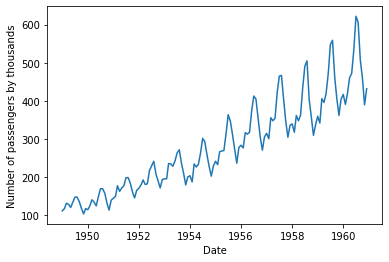

In [61]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Number of passengers by thousands')
plt.show()

Comparing the moving average and the moving standard deviation to determine if the time series is stationnary:

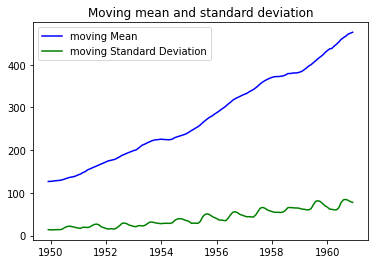

In [62]:
movingMean = df.rolling(window = 12).mean()
movingStandardDeviation = df.rolling(window = 12).std()
plt.plot(movingMean, color = 'blue', label = 'moving Mean ')
plt.plot(movingStandardDeviation, color = 'green', label = 'moving Standard Deviation')
plt.legend(loc = 'best')
plt.title('Moving mean and standard deviation')
plt.show()

Stationarization of the TS

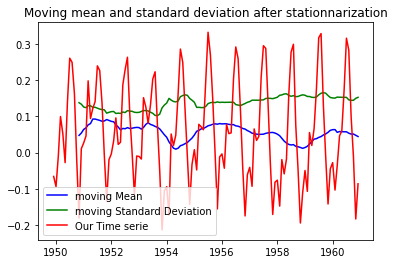

In [63]:
df_log = np.log(df)
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
movingMean = df_log_minus_mean.rolling(window = 12).mean()
movingStandardDeviation = df_log_minus_mean.rolling(window = 12).std()
plt.plot(movingMean, color = 'blue', label = 'moving Mean ')
plt.plot(movingStandardDeviation, color = 'green', label = 'moving Standard Deviation')
plt.plot(df_log_minus_mean, color = 'red', label = 'Our Time serie')
plt.legend(loc = 'best')
plt.title('Moving mean and standard deviation after stationnarization')
plt.show()
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)

Forecasting: Building ARIMA model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


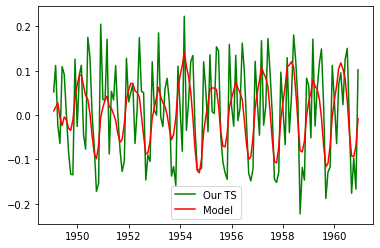

In [64]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift,color="green",label="Our TS")
plt.plot(results.fittedvalues, color='red',label="Model")
plt.legend(loc = 'best')
plt.show()

Prediction for 10 years:

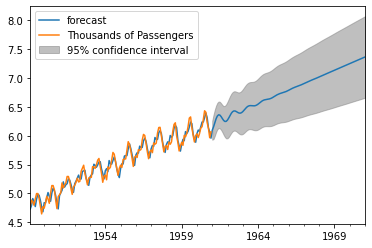

In [65]:
fig = results.plot_predict(1,264)

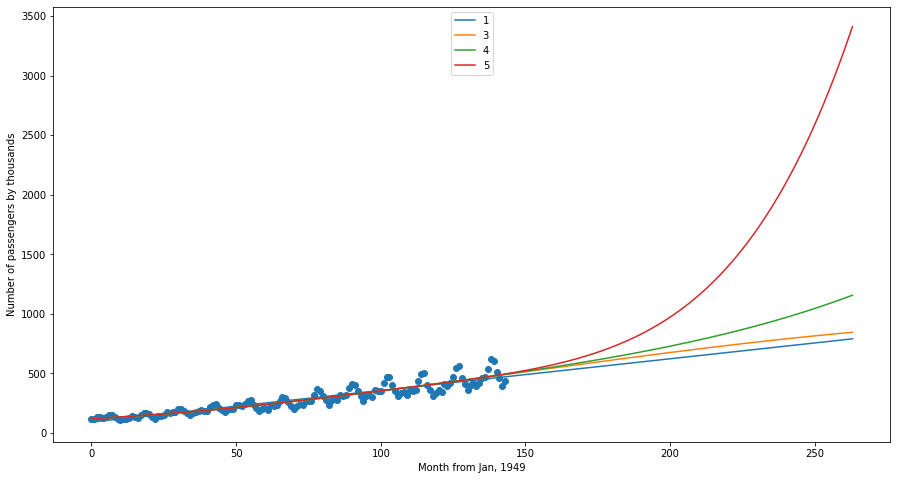

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

months = [[i] for i in range(144)]
months = np.array(months)
passengers = []
for i in df['Thousands of Passengers'].values:
  passengers.append([i])

passengers = np.array(passengers)
plt.figure(figsize=(15, 8))
plt.scatter(months, passengers)

#scaler = StandardScaler()
#months = scaler.fit_transform(months)
#scaler = StandardScaler()
#passengers = scaler.fit_transform(passengers)

months_plus_future = [[i] for i in range(264)]
months_plus_future = np.array(months_plus_future)

for d in [1, 3, 4, 5]:
    polyFeat = PolynomialFeatures(d)
    X = polyFeat.fit_transform(months)
    reg = LinearRegression().fit(X, passengers)
    plt.plot(months_plus_future, reg.predict(polyFeat.fit_transform(months_plus_future)), label = str(d))

plt.xlabel('Month from Jan, 1949')
plt.ylabel('Number of passengers by thousands')
plt.legend(loc='upper center')
plt.show()